# Machine Learning Notebook
## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data/derstandard_frontpage_data.csv')

# prepare time data
df['time'] = pd.to_datetime(df['time'])
df['weekday'] = df['time'].dt.weekday
df


,title,subtitle,link,time,kicker,n_posts,storylabels,weekday
0,Putin räumt in Videobotschaft Probleme in der ...,Die USA verlangen ein stärkeres Vorgehen gegen...,https://www.derstandard.at/jetzt/livebericht/2...,2022-12-20 23:25:00,Krieg in der Ukraine,0,NachleseLivebericht,1
1,EU-Kommission genehmigt Milliardenhilfen für d...,Der Konzern muss sich bis Ende 2026 unter ande...,https://www.derstandard.at/story/2000141983415...,2022-12-20 22:52:00,Gasimporteur,0,NaN,1
2,Stefan Bachmann wird laut ORF neuer Burgtheate...,Der Schweizer ist derzeit Intendant des Schaus...,https://www.derstandard.at/story/2000141975610...,2022-12-20 22:26:00,Kušej-Nachfolge,0,NaN,1
3,Weiter Streit um Androsch-Villa in Altaussee,Auch dasMauthausen-Komiteeschlägt die Errichtu...,https://www.derstandard.at/story/2000141982994...,2022-12-20 20:07:00,Panorama,0,NaN,1
4,Eingeschränkter OP-Betrieb auf Urologie am AKH...,Pflegemangel an der Urologie verunmögliche Ver...,https://www.derstandard.at/story/2000141957008...,2022-12-20 20:02:00,Spitalsengpässe,0,NaN,1
...,...,...,...,...,...,...,...,...
44696,Ärger über Touchscreens: Volkswagen baut nun w...,Der deutsche Autohersteller VW will künftig wi...,https://www.derstandard.at/story/3000000200347...,2023-12-20 06:00:00,"Einen Touch weniger, bitte",0,NaN,2
44697,Warum es in Österreich kein Kopftuchverbot bei...,LautEU-Höchstgerichtist ein Kopftuchverbot im ...,https://www.derstandard.at/story/3000000200411...,2023-12-20 06:00:00,EU-Urteil,0,NaN,2
44698,Werden Sie Guru!,In der besinnlichen Zeit lässt es sich gut übe...,https://www.derstandard.at/story/3000000200408...,2023-12-20 06:00:00,Renate Graber,0,Einserkastl,2
44699,"Magisch oder toxisch? Wir haben ""Tatsächlich.....",Mittlerweile hat sich sogar Regisseur Richard ...,https://www.derstandard.at/story/3000000200191...,2023-12-20 06:00:00,Wiedergesehen,0,NaN,2


<Axes: xlabel='time'>

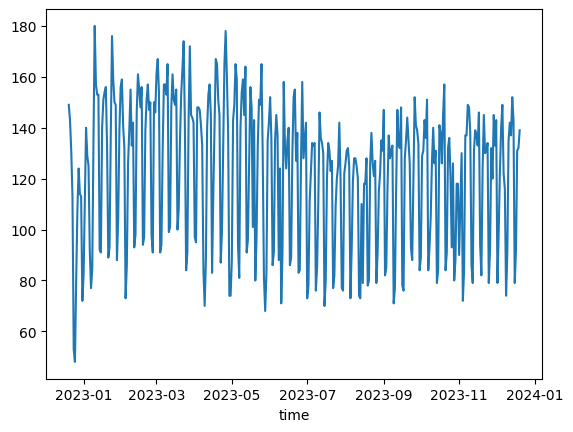

In [3]:
# plot number of articles per day
df.groupby(df['time'].dt.date).count()['title'].plot()


<Axes: xlabel='time'>

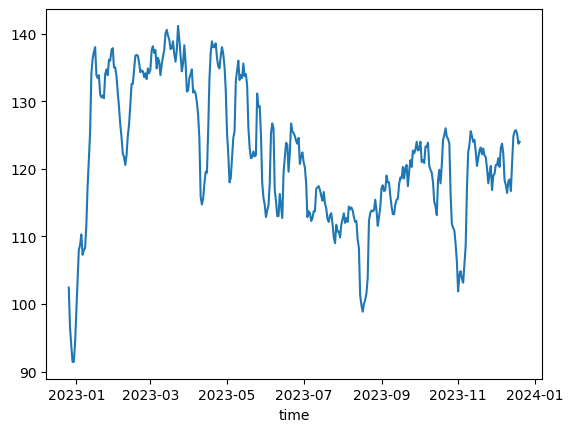

In [4]:
# make a smoothed plot of the number of articles per day
df.groupby(df['time'].dt.date).count()['title'].rolling(7).mean().plot()


<module 'matplotlib.pyplot' from 'c:\\Users\\Paul\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

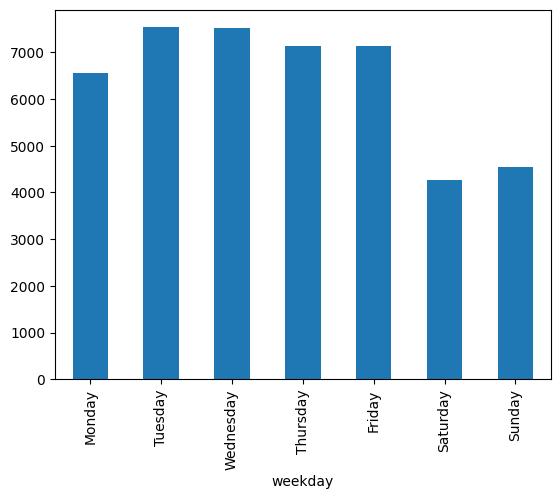

In [5]:
# which weekday has the most articles?
df.groupby('weekday').count()['title'].plot.bar()
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt


In [6]:
# how many articles have a story label? how many don't?
label_counts = df['storylabels'].value_counts(dropna=False)
print(label_counts)
print(f'\nPercentage of articles without a story label: {label_counts.iloc[0] / len(df) * 100:.2f}%')



storylabels
NaN                      34441
Video                     1508
Kommentar                 1271
Kolumne                    874
Interview                  861
Blog                       769
Spiel                      718
Diskussion                 549
Kommentar der anderen      486
Podcast                    384
Analyse                    378
Reportage                  321
LiveberichtNachlese        287
Einserkastl                282
Kopf des Tages             271
Ansichtssache              225
Test                       184
NachleseLivebericht        161
Glosse                      90
Rezension                   80
LivetickerNachlese          76
NachleseLiveticker          72
Porträt                     69
Essay                       64
Community-Artikel           32
Hintergrund                 27
Bericht                     26
Quiz                        18
Infografik                  17
Gespräch                    17
Forum+Live                  14
Gastkommentar              

<Axes: xlabel='storylabels'>

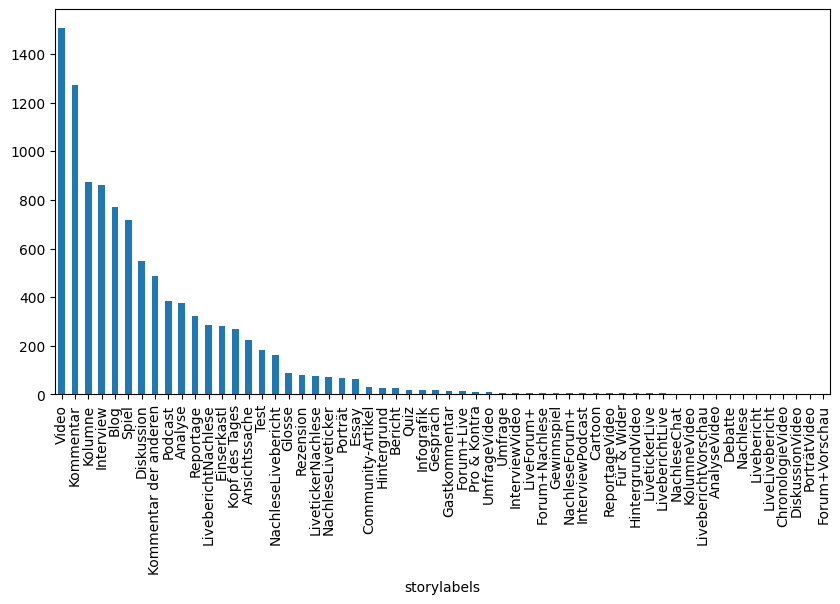

In [7]:
# Plot the number of articles per story label
plt.figure(figsize=(10, 5))
df['storylabels'].value_counts().plot.bar()


In [8]:
# Lets look at the kicker labels
kickers = df['kicker'].value_counts()
print(f'Number of unique kicker labels: {len(kickers)}\n')
# print the 20 most common kicker labels
print(f'Most common kicker labels:\n{kickers[:20]}\n')


Number of unique kicker labels: 15342

Most common kicker labels:
kicker
Fußball                   703
Sudoku                    605
Krieg in der Ukraine      570
Nachrichtenüberblick      456
USA                       413
Fussball                  399
Netzpolitik               390
TV-Tagebuch               384
Bundesliga                354
Tennis                    351
Switchlist                343
Etat-Überblick            293
Deutschland               274
Hans Rauscher             266
Thema des Tages           257
Wien                      239
IT-Business               227
Sport                     214
Künstliche Intelligenz    198
Eishockey                 180
Name: count, dtype: int64



<Figure size 1000x500 with 0 Axes>

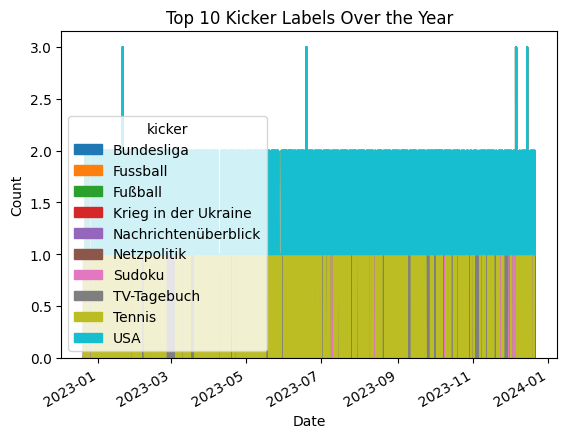

In [9]:
# plot them as a stacked chart, but it looks like sh*t, look at this later
top_10_labels = df['kicker'].value_counts().nlargest(10).index
filtered_df = df[df['kicker'].isin(top_10_labels)]

pivot_df = filtered_df.pivot_table(index='time', columns='kicker', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 5))
pivot_df.plot.area(stacked=True)
plt.title('Top 10 Kicker Labels Over the Year')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

## Machine learning
**TODO:**
* do we need to normalize some things?
* train/test split yada yada..